In [1]:
from keras import models
from keras import layers
from keras import optimizers
from keras import losses, metrics
from keras.utils import to_categorical
from keras.datasets import imdb, reuters, boston_housing
import tensorflow as tf
from tensorflow.python.client import device_lib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import utils

%matplotlib inline
sns.set_context('notebook')
plt.style.use('seaborn')

Using TensorFlow backend.


In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print(device_name)

SystemError: GPU device not found

In [4]:
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 13783910043190894010]

<p>
    <b><font color=purple size=5em>Binary Classification</font></b>
</p><br>
IMDB reviews dataset

In [5]:
# Load imdb data set
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [6]:
# Get word indices
word_index = imdb.get_word_index()
reverse_word_index = dict(
     [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [7]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [8]:
# Define a fn that applies one-hot encoding
def vectorize_sequences(sequences, dimension=10000):
    """
    Applies one-hot encoding on sequences.
    """
    resuls = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        resuls[i, sequence] = 1
        
    return resuls

In [9]:
# Convert sequences into one-hot encoding vectors
train_data = vectorize_sequences(train_data)
test_data = vectorize_sequences(test_data)
train_data.shape, test_data.shape

((25000, 10000), (25000, 10000))

In [10]:
# Vectorize labels
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [11]:
# Building fully connected NN
# Defining the network architecture
model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

# Compile the model
model.compile(optimizer=optimizers.Adam(),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

# Split the training to have validation data of size 10000
x_val, y_val = train_data[:10000], y_train[:10000]
partial_x_train = train_data[10000:]
partial_y_train = y_train[10000:]

# Fit the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    batch_size=256,
                    epochs=20,
                    validation_data=[x_val, y_val])

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 136us/step - loss: 0.4779 - binary_accuracy: 0.8008 - val_loss: 0.3115 - val_binary_accuracy: 0.8834
Epoch 2/20
15000/15000 [==============================] - 1s 99us/step - loss: 0.2240 - binary_accuracy: 0.9189 - val_loss: 0.2751 - val_binary_accuracy: 0.8893
Epoch 3/20
15000/15000 [==============================] - 1s 100us/step - loss: 0.1432 - binary_accuracy: 0.9531 - val_loss: 0.2971 - val_binary_accuracy: 0.8854
Epoch 4/20
15000/15000 [==============================] - 1s 98us/step - loss: 0.0987 - binary_accuracy: 0.9694 - val_loss: 0.3293 - val_binary_accuracy: 0.8825
Epoch 5/20
15000/15000 [==============================] - 1s 98us/step - loss: 0.0676 - binary_accuracy: 0.9835 - val_loss: 0.3772 - val_binary_accuracy: 0.8765
Epoch 6/20
15000/15000 [==============================] - 2s 126us/step - loss: 0.0452 - binary_accuracy: 0.9906 - val_loss: 0.4229 - val_binar

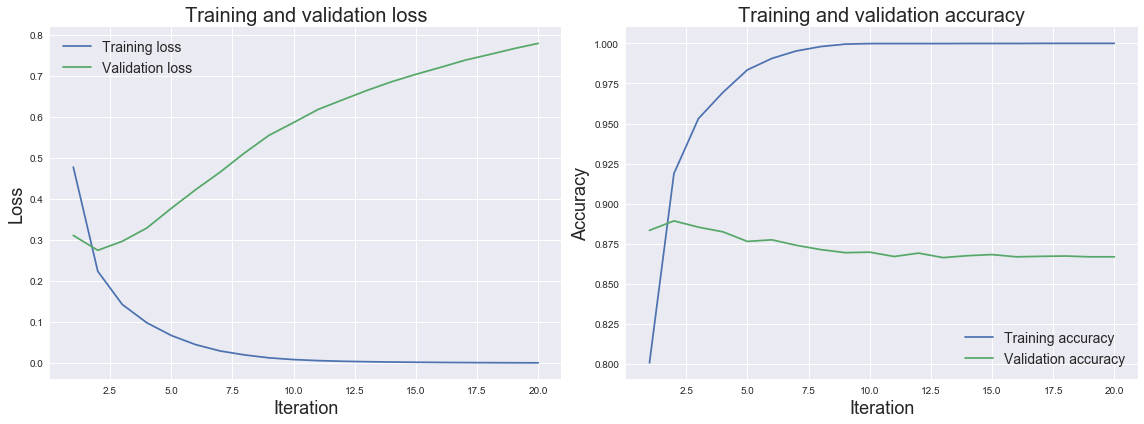

In [12]:
utils.plot_loss_and_metric(history, metric_name='binary_accuracy')

In [13]:
model.evaluate(test_data, y_test)

25000/25000 [==============================] - 2s 97us/step


[0.8452044347429275, 0.85448]

<br>
<p>
    <b><font color=purple size=5em>Muli-class Classification</font></b>
</p><br>
Reuters dataset<br>

In [14]:
# Reuters dataset
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
len(train_data), len(test_data)

(8982, 2246)

In [15]:
# Decode newswires to works
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

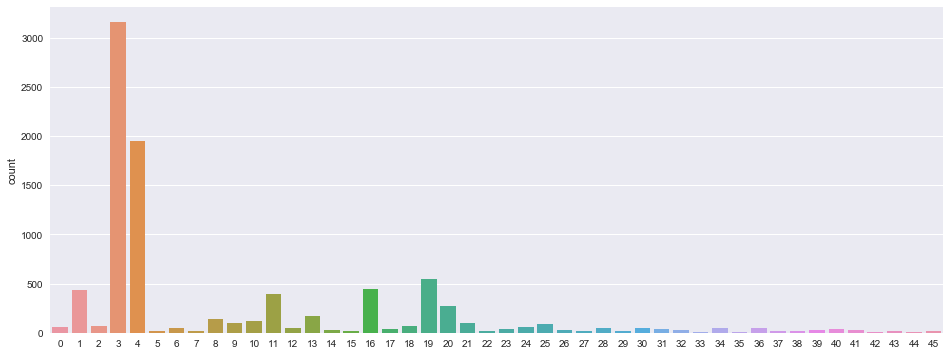

In [16]:
plt.figure(figsize=(16, 6))
sns.countplot(train_labels);

In [17]:
# Vecotrize feature data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [18]:
# Building fully connected NN
# Defining the network architecture
model = models.Sequential()
model.add(layers.Dense(64, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(46, activation="softmax"))

# Compile the model
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.categorical_crossentropy,
              metrics=[metrics.categorical_accuracy])

# Split the training to have validation data of size 1000
x_val, y_val = x_train[:1000], y_train[:1000]
partial_x_train = x_train[1000:]
partial_y_train = y_train[1000:]

# Fit the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    batch_size=256,
                    epochs=20,
                    validation_data=[x_val, y_val])

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 166us/step - loss: 2.1195 - categorical_accuracy: 0.5568 - val_loss: 1.4351 - val_categorical_accuracy: 0.6750
Epoch 2/20
7982/7982 [==============================] - 1s 115us/step - loss: 1.1798 - categorical_accuracy: 0.7437 - val_loss: 1.1634 - val_categorical_accuracy: 0.7480
Epoch 3/20
7982/7982 [==============================] - 1s 150us/step - loss: 0.8583 - categorical_accuracy: 0.8140 - val_loss: 1.0838 - val_categorical_accuracy: 0.7560
Epoch 4/20
7982/7982 [==============================] - 2s 204us/step - loss: 0.6420 - categorical_accuracy: 0.8612 - val_loss: 0.9513 - val_categorical_accuracy: 0.7950
Epoch 5/20
7982/7982 [==============================] - 1s 156us/step - loss: 0.4817 - categorical_accuracy: 0.8958 - val_loss: 0.9076 - val_categorical_accuracy: 0.8010
Epoch 6/20
7982/7982 [==============================] - 1s 172us/step - loss: 0.3651 - categorical_acc

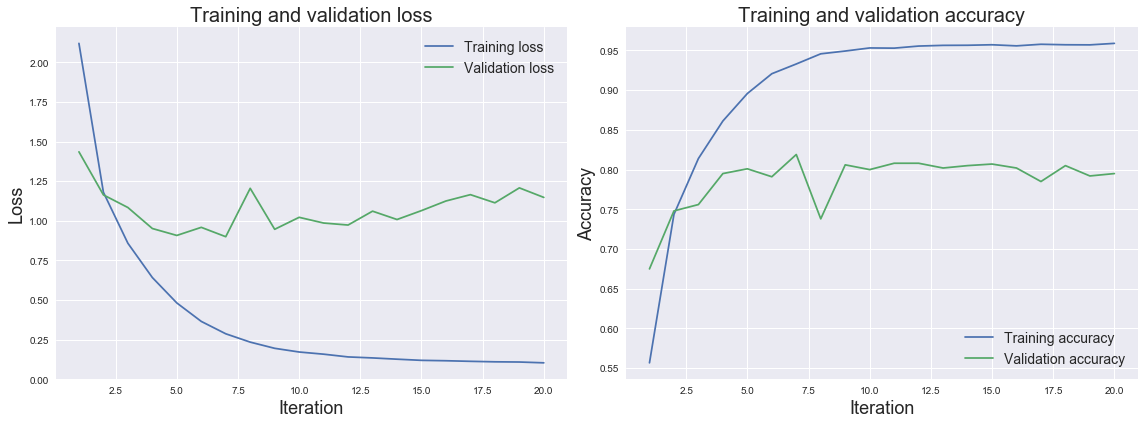

In [19]:
utils.plot_loss_and_metric(history, metric_name='categorical_accuracy')

In [20]:
preds = model.predict(x_test)

In [21]:
preds.shape

(2246, 46)

In [22]:
np.max(preds[0]), np.argmax(preds[0])

(0.914473, 3)

<br>
<p>
    <b><font color=purple size=5em>Regression</font></b>
</p><br>
Boston housing dataset<br>

In [23]:
# Boston dataset
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()
train_data.shape, test_data.shape

((404, 13), (102, 13))

In [24]:
# Standarize the data
scale = StandardScaler()
scale.fit(train_data)
train_data = scale.transform(train_data)
test_data = scale.transform(test_data)

In [25]:
# Building fully connected NN
def build_model():
    # Defining the network architecture
    model = models.Sequential()
    model.add(layers.Dense(64, activation="relu", input_shape=(13,)))
    model.add(layers.Dense(64, activation="relu"))
    model.add(layers.Dense(1))

    # Compile the model
    model.compile(optimizer="rmsprop",
                  loss="mse",
                  metrics=["mae"])
    
    return model

In [26]:
# Run k-fold CV
k = 4
num_val_examples = train_data.shape[0] // k
num_epochs = 100
all_scores = []

for i in range(k):
    print("processing fold #: ", i)
    # Split the data into val and train sets
    val_data = train_data[i * num_val_examples: (i + 1) * num_val_examples]
    val_targets = train_targets[i * num_val_examples: (i + 1) * num_val_examples]
    
    partial_train_data = np.concatenate((train_data[:i * num_val_examples],
                                         train_data[(i + 1) * num_val_examples:]))
    partial_train_targets = np.concatenate((train_targets[:i * num_val_examples],
                                            train_targets[(i + 1) * num_val_examples:]))
    
    # Run the model
    model = build_model()
    model.fit(partial_train_data,
              partial_train_targets,
              epochs=num_epochs,
              batch_size=50,
              verbose=0)
    
    # Evaluate the model on validation data
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=1)
    
    # Append the scores to all_scores
    all_scores.append(val_mae)

processing fold #:  0
101/101 [==============================] - 0s 394us/step
processing fold #:  1
101/101 [==============================] - 0s 471us/step
processing fold #:  2
101/101 [==============================] - 0s 521us/step
processing fold #:  3
101/101 [==============================] - 0s 635us/step


In [27]:
np.mean(all_scores)

2.5114631039081234

This means the we're off by ~ $2500 on average

In [28]:
# Run k-fold CV
k = 4
num_val_examples = train_data.shape[0] // k
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print("processing fold #: ", i)
    # Split the data into val and train sets
    val_data = train_data[i * num_val_examples: (i + 1) * num_val_examples]
    val_targets = train_targets[i * num_val_examples: (i + 1) * num_val_examples]
    
    partial_train_data = np.concatenate((train_data[:i * num_val_examples],
                                         train_data[(i + 1) * num_val_examples:]))
    partial_train_targets = np.concatenate((train_targets[:i * num_val_examples],
                                            train_targets[(i + 1) * num_val_examples:]))
    
    # Run the model
    model = build_model()
    history = model.fit(partial_train_data,
                        partial_train_targets,
                        epochs=num_epochs,
                        batch_size=32,
                        verbose=0,
                        validation_data=[val_data, val_targets])
    
    # Retrieve val_mae
    mae_history = history.history["val_mean_absolute_error"]
    
    # Append the scores to all_scores
    all_scores.append(mae_history)

processing fold #:  0
processing fold #:  1
processing fold #:  2
processing fold #:  3


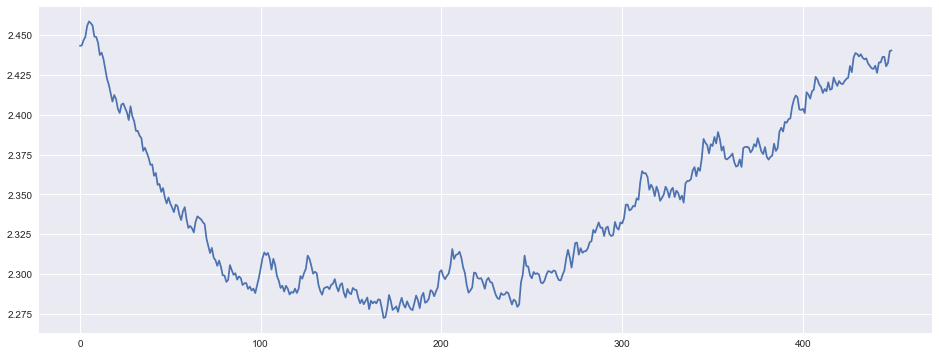

In [32]:
def smooth_curve(points, factor=0.9):
    smooth_points = []
    
    for point in points:
        if smooth_points:
            previous = smooth_points[-1]
            smooth_points.append(factor * previous + (1 - factor) * point)
        
        else:
            smooth_points.append(point)
            
    return smooth_points

all_mae_histories = all_scores[4:]
average_mae_history = np.mean(np.asarray(all_mae_histories), axis=0)

# Plot the average mae over all epochs
plt.figure(figsize=(16, 6))
plt.plot(smooth_curve(average_mae_history[50:]))